<a href="https://colab.research.google.com/github/sahar-mariam/level2-report/blob/main/ID3_decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Visualize the decision tree (requires Graphviz)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
# Sample dataset (you can replace this with your own dataset)
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'] }

df = pd.DataFrame(data)

In [6]:
print(df)

    Outlook Temperature Humidity    Wind PlayTennis
0     Sunny         Hot     High    Weak         No
1     Sunny         Hot     High  Strong         No
2  Overcast         Hot     High    Weak        Yes
3     Rainy        Mild     High    Weak        Yes
4     Rainy        Cool   Normal    Weak        Yes
5     Rainy        Cool   Normal  Strong         No
6  Overcast        Cool   Normal  Strong        Yes
7     Sunny        Mild     High    Weak         No
8     Sunny        Cool   Normal    Weak        Yes
9     Rainy        Mild   Normal  Strong         No


In [3]:
# Encode categorical data to numerical values
df_encoded = pd.get_dummies(df.drop(columns=['PlayTennis']))

# Split data into features and target
X = df_encoded
y = df['PlayTennis']

In [4]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy')  # ID3 uses entropy for information gain

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.50


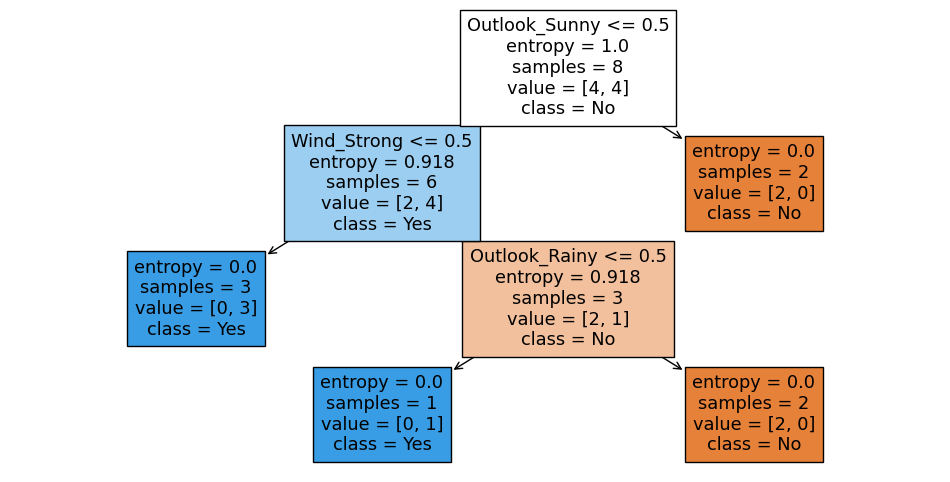

In [5]:
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()